<a href="https://colab.research.google.com/github/yogi2034/Deep-Learning/blob/main/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device="cuda" if torch.cuda.is_available() else "cpu"


2.6.0+cu124


## 1. What are 3 areas in industry where computer vision is currently being used?

Transportation,Agriculture,Automation

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

slip test: Nailed                                                          
final test : failed

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- EarlyStopping - Instead of training for long stop early or assign lesser epochs
- Dropout - Ignore a subset of units of our network
- Augmentation - Apply different type of transformations to images in the dataset
- feature Selection - selecting important features
- Remove layers - Removing a few hidden units
- CrossValidation - A part from train and test ,take some percent of samples for cross Validation




## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

Ok!

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [4]:
from torchvision import datasets, transforms

transform=transforms.ToTensor()

train_data = datasets.MNIST(root='data',
                            train=True,
                            download=True,
                            transform=transform)
test_data = datasets.MNIST(root='data',
                            train=False,
                            download=True,
                            transform=transform)

train_data,test_data

100%|██████████| 9.91M/9.91M [00:00<00:00, 51.3MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.65MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 13.9MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.73MB/s]


(Dataset MNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

## 6. Visualize at least 5 different samples of the MNIST training dataset.

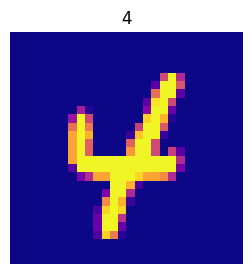

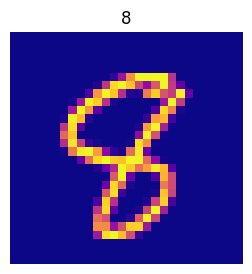

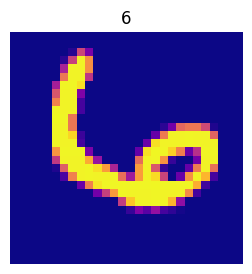

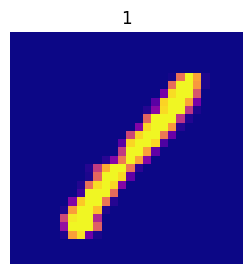

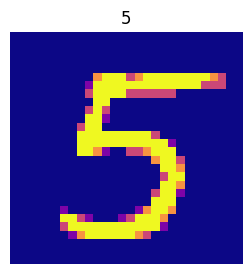

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
for i in range(5):
  idx=torch.randint(0,len(train_data),(1,)).item()
  img,label=train_data[idx]
  plt.figure(figsize=(3,4))
  plt.imshow(img.squeeze(0),cmap="plasma")
  plt.title(label)
  plt.axis(False)



## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
BATCH_SIZE=32
from torch.utils.data import DataLoader as loader
train_dataloader=loader(dataset=train_data,
                        batch_size=BATCH_SIZE,
                        shuffle=True)
test_dataloader=loader(dataset=test_data,
                        batch_size=BATCH_SIZE,
                        shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c61d01a4690>,
 <torch.utils.data.dataloader.DataLoader at 0x7c61cfad7c50>)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
# from torch import nn
# class CNN(nn.Module):
#   def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
#     super().__init__()
#     self.conv_1 = nn.Sequential(
#         nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=2, stride=1, padding=0),
#         nn.ReLU(),
#         nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=2, stride=1, padding=0),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2)
#     )

#     self.conv_2 = nn.Sequential(
#         nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=0),
#         nn.ReLU(),
#         nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=2, stride=1, padding=0),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2)
#     )

#     self.classifier=nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(in_features=hidden_units*7*7,
#                   out_features=output_shape)
#     )
#   def forward(self,x):
#     z=self.conv_1(x)
#     z=self.conv_2(z)
#     z=self.classifier(z)
#     return z

# model_0 = CNN(input_shape=1,
#                     hidden_units=10,
#                     output_shape=10).to(device)
# model_0

from torch import nn

class CNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      stride=1,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      stride=1,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

        self.conv_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      stride=1,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      stride=1,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape)
    )
    def forward(self,x):
      x=self.conv_1(x)
      x=self.conv_2(x)
      x=self.classifier(x)
      return x

    #     self._to_linear = None
    #     self.hidden_units = hidden_units
    #     self.output_shape = output_shape

    # def forward(self, x):
    #     x = self.conv_1(x)
    #     x = self.conv_2(x)

    #     if self._to_linear is None:
    #         self._to_linear = x[0].numel()

    #         self.classifier = nn.Sequential(
    #             nn.Flatten(),
    #             nn.Linear(in_features=self._to_linear, out_features=self.output_shape)
    #         )

    #     x = self.classifier(x)
    #     return x



In [8]:
device

'cpu'

In [9]:
model_0=CNN(input_shape=1,hidden_units=10,output_shape=10).to(device)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [10]:
import tqdm

In [11]:
from tqdm.auto import tqdm

model_cpu =CNN(input_shape=1,hidden_units=10,
               output_shape=10).to("cpu")
loss_fn =nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_cpu.parameters(),lr=0.1)

epochs=5
for epoch in tqdm(range(epochs)):
  train_loss=0
  model_cpu.train()
  for batch,(X,y) in enumerate(train_dataloader):
    X,y=X.to("cpu"),y.to("cpu")
    y_pred = model_cpu(X.float())
    loss = loss_fn(y_pred, y)

    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)

  total_test_loss=0
  model_cpu.eval()

  with torch.inference_mode():
    for batch,(X,y) in enumerate(test_dataloader):
      X,y=X.to("cpu"),y.to("cpu")
      test_pred=model_cpu(X)
      test_loss=loss_fn(test_pred,y)
      total_test_loss+=test_loss
    total_test_loss/=len(test_dataloader)
  print(f"epoch:{epoch}|Loss:{train_loss}|Test loss:{total_test_loss}")



  0%|          | 0/5 [00:00<?, ?it/s]

epoch:0|Loss:0.31004437804222107|Test loss:0.0753609910607338
epoch:1|Loss:0.07632243633270264|Test loss:0.07229703664779663
epoch:2|Loss:0.05932080000638962|Test loss:0.04803159087896347
epoch:3|Loss:0.05095930024981499|Test loss:0.04581671208143234
epoch:4|Loss:0.04455328360199928|Test loss:0.03990482538938522


In [12]:
from tqdm.auto import tqdm

model_gpu =CNN(input_shape=1,hidden_units=10,
               output_shape=10).to(device)
model_gpu = model_gpu.to(device)
loss_fn =nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(model_gpu.parameters(),lr=0.1)

epochs=5
for epoch in tqdm(range(epochs)):
  train_loss=0
  model_gpu.train()
  for batch,(X,y) in enumerate(train_dataloader):
    X,y=X.to(device),y.to(device)
    y_pred=model_gpu(X.float())
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)

  total_test_loss=0
  model_gpu.eval()

  with torch.inference_mode():
    for batch,(X,y) in enumerate(test_dataloader):
      X,y=X.to(device),y.to(device)
      test_pred=model_gpu(X)
      test_loss=loss_fn(test_pred,y)
      total_test_loss+=test_loss
    total_test_loss/=len(test_dataloader)
  print(f"epoch:{epoch}|Loss:{train_loss}|Test loss:{total_test_loss}")



  0%|          | 0/5 [00:00<?, ?it/s]

epoch:0|Loss:0.32732152938842773|Test loss:0.06824634224176407
epoch:1|Loss:0.07133599370718002|Test loss:0.0959063172340393
epoch:2|Loss:0.05489440634846687|Test loss:0.03918296843767166
epoch:3|Loss:0.04474256932735443|Test loss:0.04227450117468834
epoch:4|Loss:0.04059664160013199|Test loss:0.03678489848971367


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

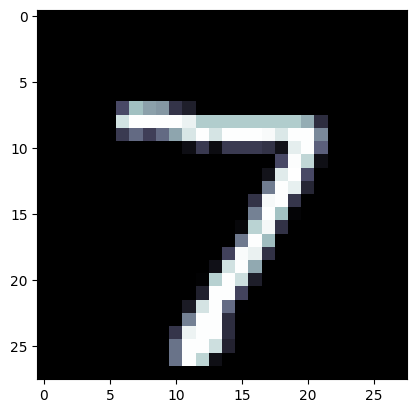

In [13]:
plt.imshow(test_data[0][0].squeeze(),cmap="bone")

In [14]:
model_pred_logits=model_gpu(test_data[0][0].unsqueeze(0).to(device))
model_pred_probs=torch.softmax(model_pred_logits,dim=1)
model_pred_label=torch.argmax(model_pred_probs,dim=1)
model_pred_label

tensor([7])

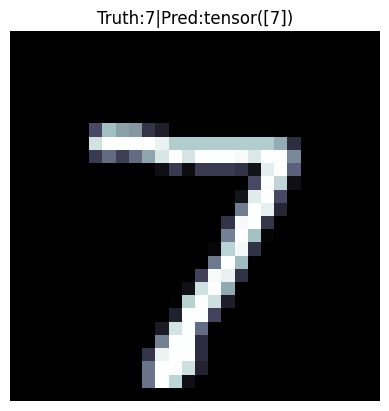

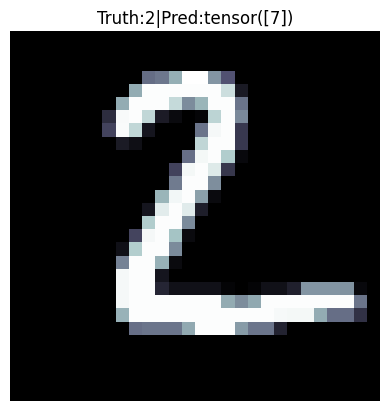

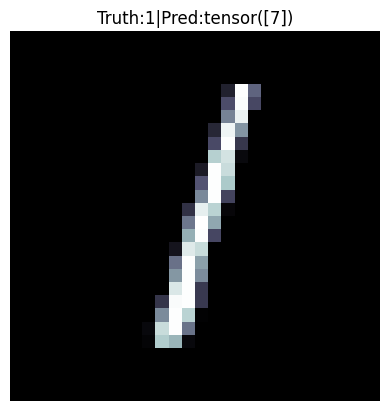

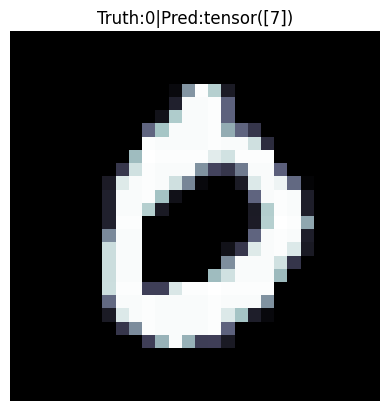

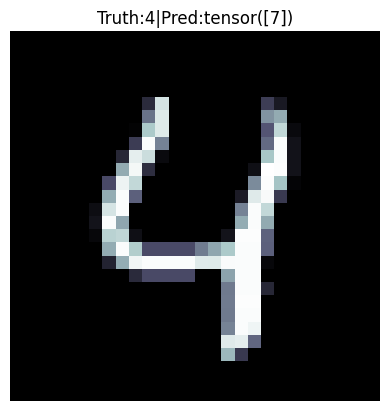

In [15]:
for i in range(5):
  img,label=test_data[i]
  pred_logits = model_gpu(test_data[0][0].unsqueeze(dim=0).to(device)) # make sure image is right shape + on right device
  pred_probs = torch.softmax(pred_logits, dim=1)
  pred_label = torch.argmax(pred_probs, dim=1)

  plt.figure()
  plt.imshow(img.squeeze(),cmap="bone")
  plt.title(f"Truth:{label}|Pred:{pred_label.cpu()}")
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [16]:
import importlib.util

def module_exists(module_name):
    return importlib.util.find_spec(module_name) is not None

# Example usage:
print(module_exists("mlxtend"))      # Check if mlxtend is installed
print(module_exists("torchmetrics")) # Check if torchmetrics is installed

True
False


In [17]:
pip install -q torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 17.8 MB/s eta 0:00:00


In [18]:
import mlxtend
print(mlxtend.__version__)

0.23.4


In [19]:
# from tqdm.auto import tqdm
# model_gpu.eval()
# y_preds=[]
# with torch.inference_mode():
#   for batch,(x,y) in tqdm(enumerate(test_dataloader)):
#     X,y=X.to(device),y.to(device)
#     y_pred_logits=model_gpu(X)
#     y_pred_labels=torch.argmax(torch.softmax(y_pred_logits,dim=1),dim=1)
#     y_preds.append(y_pred_labels)
#   y_preds=torch.cat(y_preds).cpu()
# len(y_preds)
y_preds = []
for X, y in test_dataloader:
    X = X.to("cpu")
    with torch.inference_mode():
        y_pred = model_cpu(X)
        y_preds.append(torch.argmax(y_pred, dim=1))

y_preds = torch.cat(y_preds)
print(len(y_preds))



10000


In [20]:
class_names=train_data.classes

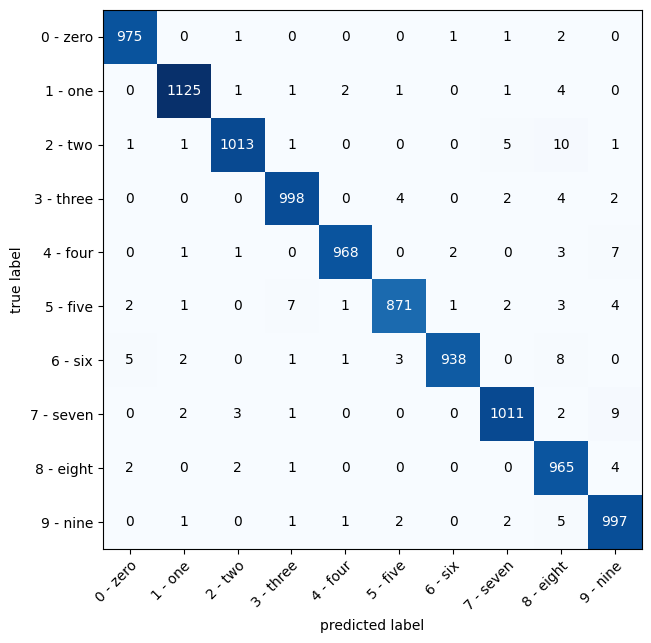

In [21]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix
confmat=ConfusionMatrix(task="multiclass",num_classes=len(class_names))
confmat_tensor=confmat(preds=y_preds,
                       target=test_data.targets)

fix,ax=plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10,7)
)

In [22]:
# len(test_data)
len(y_preds)

10000

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [23]:
random_tensor = torch.rand([1, 3, 64, 64])
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [24]:
conv_layer=nn.Conv2d(in_channels=3,
                     out_channels=64,
                     kernel_size=3,
                     stride=2,
                     padding=0)
through_layer=conv_layer(random_tensor)
random_tensor.shape,through_layer.shape

(torch.Size([1, 3, 64, 64]), torch.Size([1, 64, 31, 31]))

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [25]:
from torchvision import datasets
from torchvision import transforms

fashion_train=datasets.FashionMNIST(root='data',
                                   download=True,
                                   train=True,
                                   transform=transforms.ToTensor())
fashion_test=datasets.FashionMNIST(root='data',
                                   download=True,
                                   train=False,
                                   transform=transforms.ToTensor())


100%|██████████| 26.4M/26.4M [00:01<00:00, 18.8MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 300kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.47MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 17.6MB/s]


In [26]:
fashion_classes=fashion_train.classes

In [27]:
fashion_classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [28]:
from torch.utils.data import DataLoader
train_dataloader=DataLoader(fashion_train,
                            batch_size=32,
                            shuffle=True)
test_dataloader=DataLoader(fashion_test,
                            batch_size=32,
                            shuffle=True)



In [29]:
model_1 = CNN(input_shape=1,
                      hidden_units=10,
                      output_shape=10).to(device)
model_1

CNN(
  (conv_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [30]:
from torch import nn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [32]:
from tqdm.auto import tqdm
from torchmetrics import Accuracy

acc_fn=Accuracy(task='multiclass',num_classes=len(fashion_classes))
model_1.train()

epochs=5
for epoch in tqdm(range(epochs)):
  train_loss=0
  total_train_loss=0
  train_acc, test_acc = 0, 0
  for batch,(X,y) in enumerate(train_dataloader):
    X,y=X.to(device),y.to(device)
    y_pred=model_1(X.float())
    loss=loss_fn(y_pred,y)
    train_loss+=loss
    train_acc+=acc_fn(y_pred,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  train_loss/=len(train_dataloader)
  train_acc/=len(train_dataloader)
  total_test_loss=0
  model_gpu.eval()

  with torch.inference_mode():
    for batch,(X,y) in enumerate(test_dataloader):
      X,y=X.to(device),y.to(device)
      test_pred=model_gpu(X)
      test_loss=loss_fn(test_pred,y)
      total_test_loss+=test_loss
      test_acc+=acc_fn(test_pred,y)
    total_test_loss/=len(test_dataloader)
  print(f"epoch:{epoch}|Loss:{train_loss}|Test loss:{total_test_loss}")



  0%|          | 0/5 [00:00<?, ?it/s]

epoch:0|Loss:1.2971397638320923|Test loss:5.40817403793335
epoch:1|Loss:0.5434021353721619|Test loss:5.407938480377197
epoch:2|Loss:0.4564629793167114|Test loss:5.409553527832031
epoch:3|Loss:0.4146997928619385|Test loss:5.406711101531982
epoch:4|Loss:0.38689297437667847|Test loss:5.407810211181641


In [45]:
test_preds = []

model_1.eval()
with torch.inference_mode():
    for x, y in tqdm(test_dataloader):
        x = x.to(device)
        y_pred_labels = torch.argmax(torch.softmax(model_1(x), dim=1), dim=1)
        test_preds.append(y_pred_labels.cpu())

test_preds = torch.cat(test_preds)


  0%|          | 0/313 [00:00<?, ?it/s]

In [47]:
import numpy as np

assert len(test_preds) == len(fashion_test.targets), "Prediction and ground truth sizes don't match!"

wrong_pred_indexes = np.where(test_preds.numpy() != fashion_test.targets.numpy())[0]
print(len(wrong_pred_indexes))


8994


In [46]:
import numpy as np
wrong_pred_indexes=np.where(test_preds!=fashion_test.targets)[0]
len(wrong_pred_indexes)

8994

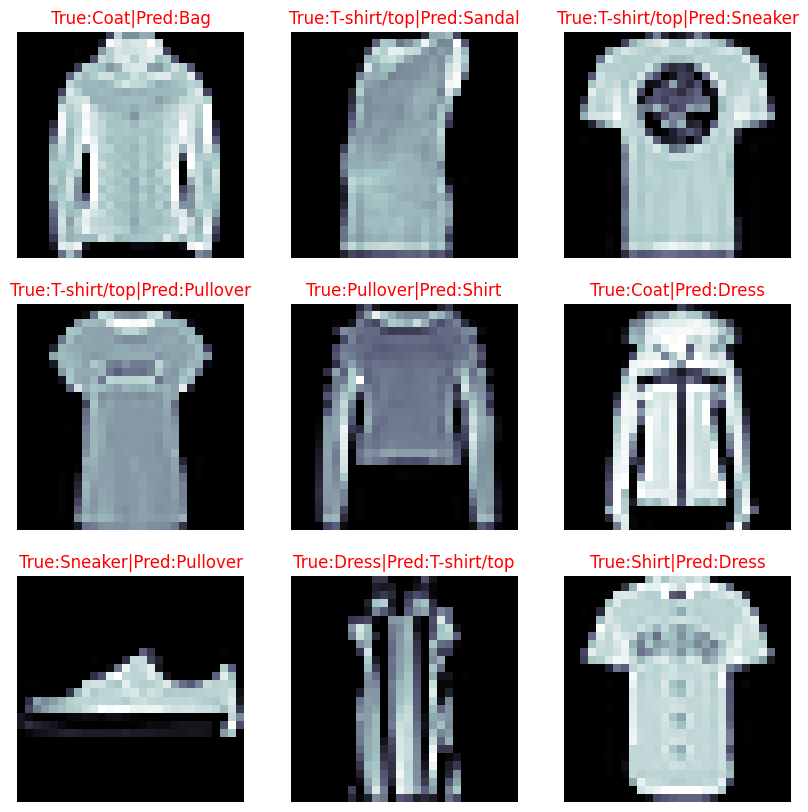

In [48]:
import random
random_selection =random.sample(list(wrong_pred_indexes),k=9)
plt.figure(figsize=(10,10))
for i,idx in enumerate(random_selection):
  true_label=fashion_classes[fashion_test[idx][1]]
  pred_label=fashion_classes[test_preds[idx]]

  plt.subplot(3,3,i+1)
  plt.imshow(fashion_test[idx][0].squeeze(),cmap='bone')
  plt.title(f"True:{true_label}|Pred:{pred_label}",c='r')
  plt.axis(False)

In [49]:
!jupyter nbconvert --ClearOutputPreprocessor.enabled=True --inplace your_notebook_name.ipynb


[NbConvertApp] WARNING | pattern 'your_notebook_name.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--exec